In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import arff
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Preprocessing

Get data. Randomly select 10000 instances.

In [2]:
data = arff.loadarff('data.arff')
df = pd.DataFrame(data[0])
df = df.sample(n = 10000).reset_index()
print(df.shape)
df.head(20)

(10000, 18)


,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,10068,48.0,b'technician',b'married',b'secondary',b'no',1637.0,b'yes',b'no',b'unknown',11.0,b'jun',305.0,10.0,-1.0,0.0,b'unknown',b'1'
1,33483,38.0,b'blue-collar',b'married',b'secondary',b'no',1205.0,b'yes',b'no',b'cellular',20.0,b'apr',45.0,4.0,153.0,1.0,b'failure',b'1'
2,22442,35.0,b'technician',b'single',b'tertiary',b'no',296.0,b'no',b'no',b'cellular',22.0,b'aug',91.0,2.0,-1.0,0.0,b'unknown',b'1'
3,1211,48.0,b'blue-collar',b'divorced',b'primary',b'no',-18.0,b'yes',b'no',b'unknown',8.0,b'may',11.0,1.0,-1.0,0.0,b'unknown',b'1'
4,30756,49.0,b'blue-collar',b'married',b'primary',b'no',183.0,b'yes',b'yes',b'cellular',6.0,b'feb',257.0,2.0,-1.0,0.0,b'unknown',b'1'
5,30042,53.0,b'blue-collar',b'divorced',b'primary',b'no',255.0,b'yes',b'no',b'cellular',4.0,b'feb',134.0,2.0,272.0,2.0,b'failure',b'1'
6,30525,30.0,b'technician',b'married',b'secondary',b'no',436.0,b'yes',b'no',b'cellular',5.0,b'feb',138.0,3.0,206.0,8.0,b'other',b'1'
7,7907,46.0,b'blue-collar',b'single',b'secondary',b'no',324.0,b'yes',b'no',b'unknown',30.0,b'may',293.0,6.0,-1.0,0.0,b'unknown',b'1'
8,17814,39.0,b'technician',b'married',b'secondary',b'no',738.0,b'no',b'yes',b'cellular',29.0,b'jul',90.0,2.0,-1.0,0.0,b'unknown',b'1'
9,43093,57.0,b'blue-collar',b'married',b'secondary',b'no',1686.0,b'no',b'no',b'telephone',22.0,b'feb',219.0,4.0,311.0,2.0,b'failure',b'1'


Convert text values to numerical values

In [3]:
for i in range(df.shape[0]):
    if i%500 == 0:
        print(i)
    #V2
    try:
        job = [b'admin.',b'unknown',b'unemployed',b'management',b'housemaid',b'entrepreneur', b'student',b'blue-collar',b'self-employed',b'retired',b'technician',b'services']
        df.loc[i,'V2'] = job.index(df.loc[i,'V2']) + 1
    except:
        df = df.drop(index=i)
    #V3
    try:
        marital = [b'married',b'divorced',b'single']
        df.loc[i,'V3'] = marital.index(df.loc[i,'V3']) + 1
    except:
        df = df.drop(index=i)
    #V4
    try:
        education = [b'unknown',b'primary',b'secondary',b'tertiary']
        df.loc[i,'V4'] = education.index(df.loc[i,'V4']) + 1
    except:
        df = df.drop(index=i)
    #V5
    try:
        default = [b'yes',b'no']
        df.loc[i,'V5'] = default.index(df.loc[i,'V5']) + 1
    except:
        df = df.drop(index=i)
    #V7
    try:
        housing = [b'yes',b'no']
        df.loc[i,'V7'] = housing.index(df.loc[i,'V7']) + 1
    except:
        df = df.drop(index=i)
    #V8
    try:
        loan = [b'yes',b'no']
        df.loc[i,'V8'] = loan.index(df.loc[i,'V8']) + 1
    except:
        df = df.drop(index=i)
    #V9
    try:
        contact = [b'unknown',b'telephone',b'cellular']
        df.loc[i,'V9'] = contact.index(df.loc[i,'V9']) + 1
    except:
        df = df.drop(index=i)
    #V11
    try:
        month = [b'jan',b'feb',b'mar',b'apr',b'may',b'jun',b'jul',b'aug',b'sep',b'oct',b'nov',b'dec']
        df.loc[i,'V11'] = month.index(df.loc[i,'V11']) + 1
    except:
        df = df.drop(index=i)
    #V16
    try:
        poutcome = [b'unknown',b'other',b'failure',b'success']
        df.loc[i,'V16'] = poutcome.index(df.loc[i,'V16']) + 1
    except:
        df = df.drop(index=i)
    #class
    try:
        classes = [b'1',b'2']
        df.loc[i,'Class'] = classes.index(df.loc[i,'Class']) + 1
    except:
        df = df.drop(index=i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [4]:
df = df.reset_index()
print(df.shape)
df.head(20)

(10000, 19)


,level_0,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,0,10068,48.0,11,1,3,2,1637.0,1,2,1,11.0,6,305.0,10.0,-1.0,0.0,1,1
1,1,33483,38.0,8,1,3,2,1205.0,1,2,3,20.0,4,45.0,4.0,153.0,1.0,3,1
2,2,22442,35.0,11,3,4,2,296.0,2,2,3,22.0,8,91.0,2.0,-1.0,0.0,1,1
3,3,1211,48.0,8,2,2,2,-18.0,1,2,1,8.0,5,11.0,1.0,-1.0,0.0,1,1
4,4,30756,49.0,8,1,2,2,183.0,1,1,3,6.0,2,257.0,2.0,-1.0,0.0,1,1
5,5,30042,53.0,8,2,2,2,255.0,1,2,3,4.0,2,134.0,2.0,272.0,2.0,3,1
6,6,30525,30.0,11,1,3,2,436.0,1,2,3,5.0,2,138.0,3.0,206.0,8.0,2,1
7,7,7907,46.0,8,3,3,2,324.0,1,2,1,30.0,5,293.0,6.0,-1.0,0.0,1,1
8,8,17814,39.0,11,1,3,2,738.0,2,1,3,29.0,7,90.0,2.0,-1.0,0.0,1,1
9,9,43093,57.0,8,1,3,2,1686.0,2,2,2,22.0,2,219.0,4.0,311.0,2.0,3,1


Standardize selected columns of values

In [5]:
df['V1'] = (df['V1'] - df['V1'].mean()) / df['V1'].std()
df['V6'] = (df['V6'] - df['V6'].mean()) / df['V6'].std()
df['V12'] = (df['V12'] - df['V12'].mean()) / df['V12'].std()
df.head(20)

,level_0,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,0,10068,0.672231,11,1,3,2,0.069282,1,2,1,11.0,6,0.190159,10.0,-1.0,0.0,1,1
1,1,33483,-0.266482,8,1,3,2,-0.068611,1,2,3,20.0,4,-0.826975,4.0,153.0,1.0,3,1
2,2,22442,-0.548096,11,3,4,2,-0.358760,2,2,3,22.0,8,-0.647021,2.0,-1.0,0.0,1,1
3,3,1211,0.672231,8,2,2,2,-0.458988,1,2,1,8.0,5,-0.959985,1.0,-1.0,0.0,1,1
4,4,30756,0.766102,8,1,2,2,-0.394829,1,1,3,6.0,2,0.002380,2.0,-1.0,0.0,1,1
5,5,30042,1.141587,8,2,2,2,-0.371847,1,2,3,4.0,2,-0.478803,2.0,272.0,2.0,3,1
6,6,30525,-1.017452,11,1,3,2,-0.314073,1,2,3,5.0,2,-0.463154,3.0,206.0,8.0,2,1
7,7,7907,0.484488,8,3,3,2,-0.349823,1,2,1,30.0,5,0.143214,6.0,-1.0,0.0,1,1
8,8,17814,-0.172611,11,1,3,2,-0.217676,2,1,3,29.0,7,-0.650933,2.0,-1.0,0.0,1,1
9,9,43093,1.517073,8,1,3,2,0.084922,2,2,2,22.0,2,-0.146278,4.0,311.0,2.0,3,1


Split the dataframe into X and Y

In [6]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]
print(X.shape)
print(Y.shape)

(10000, 18)
(10000,)


Split the instances into 7000 training sets, 3000 testing sets.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
X_train, X_test, Y_train, Y_test = X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()
# Y_2d_train = Y_train.reshape(600,1)
# Y_2d_test = Y_test.reshape(200,1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# print(Y_2d_train.shape)
# print(Y_2d_test.shape)

(7000, 18)
(3000, 18)
(7000,)
(3000,)


Delete first 2 columns

In [8]:
X_train = np.delete(X_train, 0, 1)
X_train = np.delete(X_train, 0, 1)
X_test = np.delete(X_test, 0, 1)
X_test = np.delete(X_test, 0, 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7000, 16)
(3000, 16)
(7000,)
(3000,)


Data transformation: take square of everything in X

In [9]:
X_train_2 = X_train**2
#X_train_3 = X_train**3
X_test_2 = X_test**2
#X_test_3 = X_test**3
print(X_train[0])
print(X_train_2[0])
#print(X_train_3[0])

[-0.641966929659518 8 3 4 2 -0.43983611102600373 2 2 3 5.0 8
 0.1588622646522085 1.0 -1.0 0.0 1]
[0.41212153877646845 64 9 16 4 0.19345580456247907 4 4 9 25.0 64
 0.025237219130428337 1.0 1.0 0.0 1]


Create table

In [10]:
table = [['C=10^']]
powers = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
for i in range(len(powers)):
    table[0].append(str(powers[i]))
def printTable(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print ('\n'.join(table))

# Logistic Regression

Use sklearn LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
Y_train = Y_train.ravel().astype('int')
Y_test = Y_test.ravel().astype('int')

Create lists of c-value, X_train, X_test

In [13]:
powers = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
X_trains = [X_train, X_train_2]
X_tests = [X_test, X_test_2]

L2 Regularization

X: 1
C=10^ 0
              precision    recall  f1-score   support

           1       0.92      0.98      0.95      2671
           2       0.64      0.29      0.40       329

    accuracy                           0.90      3000
   macro avg       0.78      0.64      0.68      3000
weighted avg       0.89      0.90      0.89      3000



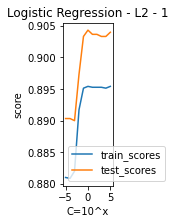

X: 2
C=10^ -3
              precision    recall  f1-score   support

           1       0.90      0.99      0.94      2671
           2       0.57      0.10      0.17       329

    accuracy                           0.89      3000
   macro avg       0.74      0.54      0.55      3000
weighted avg       0.86      0.89      0.86      3000



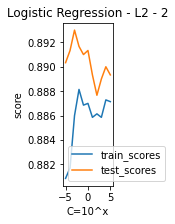

C=10^               	-5    	-4    	-3    	-2    	-1    	0     	1     	2     	3     	4     	5     
L2, X^1, train score	0.8810	0.8809	0.8820	0.8917	0.8951	0.8954	0.8953	0.8953	0.8953	0.8951	0.8954
L2, X^1, test score 	0.8903	0.8903	0.8900	0.8973	0.9033	0.9043	0.9037	0.9037	0.9033	0.9033	0.9040
L2, X^2, train score	0.8809	0.8817	0.8860	0.8881	0.8869	0.8870	0.8859	0.8861	0.8859	0.8873	0.8871
L2, X^2, test score 	0.8903	0.8913	0.8930	0.8917	0.8910	0.8913	0.8893	0.8877	0.8890	0.8900	0.8893


In [14]:
for i in range(2):
    string1 = "L2, X^"+str(i+1)+", train score"
    new_table_row1 = [string1]
    string2 = "L2, X^"+str(i+1)+", test score"
    new_table_row2 = [string2]
    train_scores = []
    test_scores = []
    for power in powers:
        model = LogisticRegression(max_iter=10**6, C=10**power)
        model.fit(X_trains[i], Y_train)
        Y_pred = model.predict(X_tests[i])
        train_score = model.score(X_trains[i], Y_train)
        test_score = model.score(X_tests[i], Y_test)
        try:
            if test_score >= max(test_scores):
                best_C = power
                best_model = model
                best_Y_pred = Y_pred
        except:
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
        train_scores.append(train_score)
        test_scores.append(test_score)
        new_table_row1.append(str(format(train_score, '.4f')))
        new_table_row2.append(str(format(test_score, '.4f')))
    
    print("X: "+str(i+1))
    print("C=10^",best_C)
    print(classification_report(Y_test, best_Y_pred, zero_division=0))
    
    plt.figure(figsize=(3, 3))
    plt.subplot(1,3,i+1)
    plt.plot(powers, train_scores, label='train_scores')
    plt.plot(powers, test_scores, label='test_scores')
    plt.title('Logistic Regression - L2 - '+str(i+1))
    plt.xlabel('C=10^x')
    plt.ylabel('score')
    plt.legend(loc='best')
    plt.show()
    
    table.append(new_table_row1)
    table.append(new_table_row2)

printTable(table)

L1 regularization

X: 1
C=10^ 0
              precision    recall  f1-score   support

           1       0.92      0.98      0.95      2671
           2       0.64      0.29      0.40       329

    accuracy                           0.90      3000
   macro avg       0.78      0.64      0.68      3000
weighted avg       0.89      0.90      0.89      3000



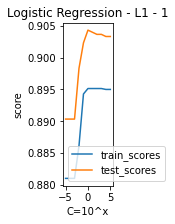

X: 2
C=10^ 5
              precision    recall  f1-score   support

           1       0.91      0.98      0.94      2671
           2       0.60      0.19      0.29       329

    accuracy                           0.90      3000
   macro avg       0.75      0.59      0.62      3000
weighted avg       0.87      0.90      0.87      3000



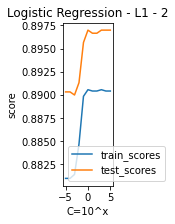

C=10^               	-5    	-4    	-3    	-2    	-1    	0     	1     	2     	3     	4     	5     
L2, X^1, train score	0.8810	0.8809	0.8820	0.8917	0.8951	0.8954	0.8953	0.8953	0.8953	0.8951	0.8954
L2, X^1, test score 	0.8903	0.8903	0.8900	0.8973	0.9033	0.9043	0.9037	0.9037	0.9033	0.9033	0.9040
L2, X^2, train score	0.8809	0.8817	0.8860	0.8881	0.8869	0.8870	0.8859	0.8861	0.8859	0.8873	0.8871
L2, X^2, test score 	0.8903	0.8913	0.8930	0.8917	0.8910	0.8913	0.8893	0.8877	0.8890	0.8900	0.8893
L1, X^1, train score	0.8810	0.8810	0.8810	0.8861	0.8943	0.8951	0.8951	0.8951	0.8951	0.8950	0.8950
L1, X^1, test score 	0.8903	0.8903	0.8903	0.8983	0.9023	0.9043	0.9040	0.9037	0.9037	0.9033	0.9033
L1, X^2, train score	0.8810	0.8810	0.8814	0.8847	0.8899	0.8906	0.8904	0.8904	0.8906	0.8904	0.8904
L1, X^2, test score 	0.8903	0.8903	0.8900	0.8913	0.8957	0.8970	0.8967	0.8967	0.8970	0.8970	0.8970


In [15]:
for i in range(2):
    string1 = "L1, X^"+str(i+1)+", train score"
    new_table_row1 = [string1]
    string2 = "L1, X^"+str(i+1)+", test score"
    new_table_row2 = [string2]
    train_scores = []
    test_scores = []
    for power in powers:
        model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10**6, C=10**power)
        model.fit(X_trains[i], Y_train)
        Y_pred = model.predict(X_tests[i])
        train_score = model.score(X_trains[i], Y_train)
        test_score = model.score(X_tests[i], Y_test)
        try:
            if test_score >= max(test_scores):
                best_C = power
                best_model = model
                best_Y_pred = Y_pred
        except:
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
        train_scores.append(train_score)
        test_scores.append(test_score)
        new_table_row1.append(str(format(train_score, '.4f')))
        new_table_row2.append(str(format(test_score, '.4f')))
    
    print("X: "+str(i+1))
    print("C=10^",best_C)
    print(classification_report(Y_test, best_Y_pred, zero_division=0))
    
    plt.figure(figsize=(3, 3))
    plt.subplot(1,3,i+1)
    plt.plot(powers, train_scores, label='train_scores')
    plt.plot(powers, test_scores, label='test_scores')
    plt.title('Logistic Regression - L1 - '+str(i+1))
    plt.xlabel('C=10^x')
    plt.ylabel('score')
    plt.legend(loc='best')
    plt.show()
    table.append(new_table_row1)
    table.append(new_table_row2)

printTable(table)

Elasticnet regularization

X: 1
C=10^ -1
              precision    recall  f1-score   support

           1       0.91      0.98      0.95      2671
           2       0.61      0.24      0.34       329

    accuracy                           0.90      3000
   macro avg       0.76      0.61      0.64      3000
weighted avg       0.88      0.90      0.88      3000



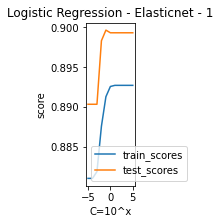

X: 2
C=10^ 5
              precision    recall  f1-score   support

           1       0.89      1.00      0.94      2671
           2       0.00      0.00      0.00       329

    accuracy                           0.89      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.79      0.89      0.84      3000



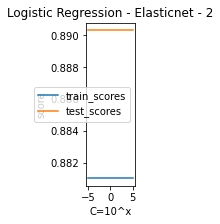

C=10^                       	-5    	-4    	-3    	-2    	-1    	0     	1     	2     	3     	4     	5     
L2, X^1, train score        	0.8810	0.8809	0.8820	0.8917	0.8951	0.8954	0.8953	0.8953	0.8953	0.8951	0.8954
L2, X^1, test score         	0.8903	0.8903	0.8900	0.8973	0.9033	0.9043	0.9037	0.9037	0.9033	0.9033	0.9040
L2, X^2, train score        	0.8809	0.8817	0.8860	0.8881	0.8869	0.8870	0.8859	0.8861	0.8859	0.8873	0.8871
L2, X^2, test score         	0.8903	0.8913	0.8930	0.8917	0.8910	0.8913	0.8893	0.8877	0.8890	0.8900	0.8893
L1, X^1, train score        	0.8810	0.8810	0.8810	0.8861	0.8943	0.8951	0.8951	0.8951	0.8951	0.8950	0.8950
L1, X^1, test score         	0.8903	0.8903	0.8903	0.8983	0.9023	0.9043	0.9040	0.9037	0.9037	0.9033	0.9033
L1, X^2, train score        	0.8810	0.8810	0.8814	0.8847	0.8899	0.8906	0.8904	0.8904	0.8906	0.8904	0.8904
L1, X^2, test score         	0.8903	0.8903	0.8900	0.8913	0.8957	0.8970	0.8967	0.8967	0.8970	0.8970	0.8970
Elasticnet, X^1, train score	0.8810	0.8810	0.8

In [16]:
for i in range(2):
    string1 = "Elasticnet, X^"+str(i+1)+", train score"
    new_table_row1 = [string1]
    string2 = "Elasticnet, X^"+str(i+1)+", test score"
    new_table_row2 = [string2]
    train_scores = []
    test_scores = []
    for power in powers:
        model = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5, max_iter=10**6, C=10**power)
        model.fit(X_trains[i], Y_train)
        Y_pred = model.predict(X_tests[i])
        train_score = model.score(X_trains[i], Y_train)
        test_score = model.score(X_tests[i], Y_test)
        try:
            if test_score >= max(test_scores):
                best_C = power
                best_model = model
                best_Y_pred = Y_pred
        except:
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
        train_scores.append(train_score)
        test_scores.append(test_score)
        new_table_row1.append(str(format(train_score, '.4f')))
        new_table_row2.append(str(format(test_score, '.4f')))
    
    print("X: "+str(i+1))
    print("C=10^",best_C)
    print(classification_report(Y_test, best_Y_pred, zero_division=0))
    
    plt.figure(figsize=(3, 3))
    plt.subplot(1,3,i+1)
    plt.plot(powers, train_scores, label='train_scores')
    plt.plot(powers, test_scores, label='test_scores')
    plt.title('Logistic Regression - Elasticnet - '+str(i+1))
    plt.xlabel('C=10^x')
    plt.ylabel('score')
    plt.legend(loc='best')
    plt.show()
    table.append(new_table_row1)
    table.append(new_table_row2)

printTable(table)

No regularization

In [17]:
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
model = LogisticRegression(penalty='none',max_iter=10**6)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8952857142857142
0.9036666666666666
[[2613   58]
 [ 231   98]]
              precision    recall  f1-score   support

           1       0.92      0.98      0.95      2671
           2       0.63      0.30      0.40       329

    accuracy                           0.90      3000
   macro avg       0.77      0.64      0.68      3000
weighted avg       0.89      0.90      0.89      3000



In [18]:
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
model = LogisticRegression(penalty='none',max_iter=10**6)
model.fit(X_train_2, Y_train)

Y_pred = model.predict(X_test_2)

print(model.score(X_train_2, Y_train))
print(model.score(X_test_2, Y_test))

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8858571428571429
0.889
[[2620   51]
 [ 282   47]]
              precision    recall  f1-score   support

           1       0.90      0.98      0.94      2671
           2       0.48      0.14      0.22       329

    accuracy                           0.89      3000
   macro avg       0.69      0.56      0.58      3000
weighted avg       0.86      0.89      0.86      3000



Best!

In [19]:
bestmodel = LogisticRegression(max_iter=10**6)
bestmodel.fit(X_trains[i], Y_train)
Y_pred = bestmodel.predict(X_tests[i])
bestmodel.coef_

array([[ 1.35374718e-01, -3.16950685e-03,  4.60668459e-02,
         1.63469542e-02, -4.80949383e-01,  9.99037109e-04,
         9.48856593e-02, -3.01340794e-01,  1.04858735e-02,
        -4.01393926e-04,  2.64974340e-04,  1.72449186e-01,
        -7.09758690e-03, -2.65975248e-06, -8.46967714e-04,
         1.58203669e-01]])

# SVM

Use sklearn.svm

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
from sklearn import svm
powers2 = [-3,-2,-1,0,1,2,3]

Recreate table

In [21]:
table = [['C=10^']]
powers = [-3,-2,-1,0,1,2,3]
for i in range(len(powers)):
    table[0].append(str(powers[i]))

Linear kernel

In [22]:
#svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
train_scores = []
test_scores = []
string1 = "Linear, train score"
new_table_row1 = [string1]
string2 = "Linear, test score"
new_table_row2 = [string2]
for power in powers2:
    print('power: '+str(power))
    model = svm.SVC(kernel='linear', C=10**power)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    try:
        if test_score >= max(test_scores):
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
    except:
        best_C = power
        best_model = model
        best_Y_pred = Y_pred
    train_scores.append(train_score)
    test_scores.append(test_score)
    new_table_row1.append(str(format(train_score, '.4f')))
    new_table_row2.append(str(format(test_score, '.4f')))
    
print("C=10^",best_C)
print(confusion_matrix(Y_test, best_Y_pred))
print(classification_report(Y_test, best_Y_pred, zero_division=0))

plt.plot(powers2, train_scores, label='train_scores')
plt.plot(powers2, test_scores, label='test_scores')
plt.title('SVM - Linear')
plt.xlabel('C=10^x')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

table.append(new_table_row1)
table.append(new_table_row2)

printTable(table)

power: -3
power: -2
power: -1
power: 0
power: 1
power: 2
power: 3
C=10^              	-3    	-2    	-1    	0     	1     	2     	3     
Linear, train score	0.8810	0.8810	0.8814	0.8814	0.8874	0.8890	0.8846
Linear, test score 	0.8903	0.8903	0.8910	0.8910	0.8953	0.8977	0.8950


polynomial kernel

In [23]:
#svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
train_scores = []
test_scores = []
string1 = "Polynomial, train score"
new_table_row1 = [string1]
string2 = "Polynomial, test score"
new_table_row2 = [string2]
for power in powers2:
    print('power: '+str(power))
    model = svm.SVC(kernel='poly', C=10**power)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    try:
        if test_score >= max(test_scores):
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
    except:
        best_C = power
        best_model = model
        best_Y_pred = Y_pred
    train_scores.append(train_score)
    test_scores.append(test_score)
    new_table_row1.append(str(format(train_score, '.4f')))
    new_table_row2.append(str(format(test_score, '.4f')))
    
print("C=10^",best_C)
print(confusion_matrix(Y_test, best_Y_pred))
print(classification_report(Y_test, best_Y_pred, zero_division=0))

plt.plot(powers2, train_scores, label='train_scores')
plt.plot(powers2, test_scores, label='test_scores')
plt.title('SVM - Polynomial')
plt.xlabel('C=10^x')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

table.append(new_table_row1)
table.append(new_table_row2)

printTable(table)

power: -3
power: -2
power: -1
power: 0
power: 1
power: 2
power: 3
C=10^                  	-3    	-2    	-1    	0     	1     	2     	3     
Linear, train score    	0.8810	0.8810	0.8814	0.8814	0.8874	0.8890	0.8846
Linear, test score     	0.8903	0.8903	0.8910	0.8910	0.8953	0.8977	0.8950
Polynomial, train score	0.8810	0.8810	0.8810	0.8811	0.8827	0.8836	0.8893
Polynomial, test score 	0.8903	0.8903	0.8903	0.8907	0.8900	0.8907	0.8937


rbf kernel

In [24]:
#svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
train_scores = []
test_scores = []
string1 = "RBF, train score"
new_table_row1 = [string1]
string2 = "RBF, test score"
new_table_row2 = [string2]
for power in powers2:
    print('power: '+str(power))
    model = svm.SVC(kernel='rbf', C=10**power)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    try:
        if test_score >= max(test_scores):
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
    except:
        best_C = power
        best_model = model
        best_Y_pred = Y_pred
    train_scores.append(train_score)
    test_scores.append(test_score)
    new_table_row1.append(str(format(train_score, '.4f')))
    new_table_row2.append(str(format(test_score, '.4f')))
    
print("C=10^",best_C)
print(confusion_matrix(Y_test, best_Y_pred))
print(classification_report(Y_test, best_Y_pred, zero_division=0))

plt.plot(powers2, train_scores, label='train_scores')
plt.plot(powers2, test_scores, label='test_scores')
plt.title('SVM - rbf')
plt.xlabel('C=10^x')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

table.append(new_table_row1)
table.append(new_table_row2)

printTable(table)

power: -3
power: -2
power: -1
power: 0
power: 1
power: 2
power: 3
C=10^                  	-3    	-2    	-1    	0     	1     	2     	3     
Linear, train score    	0.8810	0.8810	0.8814	0.8814	0.8874	0.8890	0.8846
Linear, test score     	0.8903	0.8903	0.8910	0.8910	0.8953	0.8977	0.8950
Polynomial, train score	0.8810	0.8810	0.8810	0.8811	0.8827	0.8836	0.8893
Polynomial, test score 	0.8903	0.8903	0.8903	0.8907	0.8900	0.8907	0.8937
RBF, train score       	0.8810	0.8810	0.8810	0.8810	0.8814	0.8941	0.9000
RBF, test score        	0.8903	0.8903	0.8903	0.8903	0.8893	0.8957	0.8943


sigmoid kernel

In [25]:
#svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
train_scores = []
test_scores = []
string1 = "Sigmoid, train score"
new_table_row1 = [string1]
string2 = "Sigmoid, test score"
new_table_row2 = [string2]
for power in powers2:
    print('power: '+str(power))
    model = svm.SVC(kernel='sigmoid', C=10**power)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    try:
        if test_score >= max(test_scores):
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
    except:
        best_C = power
        best_model = model
        best_Y_pred = Y_pred
    train_scores.append(train_score)
    test_scores.append(test_score)
    new_table_row1.append(str(format(train_score, '.4f')))
    new_table_row2.append(str(format(test_score, '.4f')))
    
print("C=10^",best_C)
print(confusion_matrix(Y_test, best_Y_pred))
print(classification_report(Y_test, best_Y_pred, zero_division=0))

plt.plot(powers2, train_scores, label='train_scores')
plt.plot(powers2, test_scores, label='test_scores')
plt.title('SVM - sigmoid')
plt.xlabel('C=10^x')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

table.append(new_table_row1)
table.append(new_table_row2)

printTable(table)

power: -3
power: -2
power: -1
power: 0
power: 1
power: 2
power: 3
C=10^                  	-3    	-2    	-1    	0     	1     	2     	3     
Linear, train score    	0.8810	0.8810	0.8814	0.8814	0.8874	0.8890	0.8846
Linear, test score     	0.8903	0.8903	0.8910	0.8910	0.8953	0.8977	0.8950
Polynomial, train score	0.8810	0.8810	0.8810	0.8811	0.8827	0.8836	0.8893
Polynomial, test score 	0.8903	0.8903	0.8903	0.8907	0.8900	0.8907	0.8937
RBF, train score       	0.8810	0.8810	0.8810	0.8810	0.8814	0.8941	0.9000
RBF, test score        	0.8903	0.8903	0.8903	0.8903	0.8893	0.8957	0.8943
Sigmoid, train score   	0.8810	0.8810	0.8810	0.8746	0.8554	0.8569	0.8511
Sigmoid, test score    	0.8903	0.8903	0.8903	0.8813	0.8593	0.8610	0.8517


Best!

In [28]:
coefs = bestmodel.coef_
coefs

array([[ 1.35374718e-01, -3.16950685e-03,  4.60668459e-02,
         1.63469542e-02, -4.80949383e-01,  9.99037109e-04,
         9.48856593e-02, -3.01340794e-01,  1.04858735e-02,
        -4.01393926e-04,  2.64974340e-04,  1.72449186e-01,
        -7.09758690e-03, -2.65975248e-06, -8.46967714e-04,
         1.58203669e-01]])

In [44]:
paras = ["age","job","marital","education","credit","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]
title = ["#", "feature", "absoulte value"]
weight_table = []
for i in range(16):
    n = "V"+str(i+1)
    weight = coefs[0][i]
    weight_table.append([n, paras[i], weight])

weight_table2 = sorted(weight_table, key=lambda x: -abs(x[2]))
weight_table2.insert(0, title)
printTable(weight_table2)

#  	feature  	absoulte value         
V5 	credit   	-0.48094938255862535   
V8 	loan     	-0.3013407941188018    
V12	duration 	0.17244918583304264    
V16	poutcome 	0.1582036694208702     
V1 	age      	0.1353747179898286     
V7 	housing  	0.0948856592627792     
V3 	marital  	0.046066845866337636   
V4 	education	0.01634695424913625    
V9 	contact  	0.01048587347836185    
V13	campaign 	-0.007097586903728892  
V2 	job      	-0.0031695068529891076 
V6 	balance  	0.000999037108611094   
V15	previous 	-0.0008469677135408886 
V10	day      	-0.00040139392592551004
V11	month    	0.00026497434033721513 
V14	pdays    	-2.6597524789551797e-06


In [47]:
bestmodel = LogisticRegression(max_iter=10**6)
bestmodel.fit(X_train, Y_train)
coefs = bestmodel.coef_

paras = ["age","job","marital","education","credit","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]
title = ["#", "feature", "absoulte value"]
weight_table = []
for i in range(16):
    n = "V"+str(i+1)
    weight = coefs[0][i]
    weight_table.append([n, paras[i], weight])

weight_table2 = sorted(weight_table, key=lambda x: -abs(x[2]))
weight_table2.insert(0, title)
printTable(weight_table2)

#  	feature  	absoulte value        
V12	duration 	1.051400069906811     
V7 	housing  	0.8977622400989785    
V16	poutcome 	0.7680505773823237    
V8 	loan     	0.4828391047416844    
V9 	contact  	0.47682649539725935   
V5 	credit   	0.4095914643939325    
V4 	education	0.2237617327764284    
V3 	marital  	0.22180476426109405   
V13	campaign 	-0.1089097149160986   
V1 	age      	0.08516346963207476   
V6 	balance  	0.02167827232824146   
V10	day      	-0.009262085110660526 
V2 	job      	-0.006951327081755144 
V14	pdays    	-0.0020429956792170365
V11	month    	-0.0008688615578767077
V15	previous 	0.0007194549175827377 
